<h1>Walmart Project</h1>

<h3>Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply</h3>

<h4>You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following: 

    
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
</h4>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

In [3]:
df = pd.read_csv("./Walmart DataSet.csv", parse_dates = ["Date"])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<h4>Understanding of Data</h4>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


<h4>Data Cleaning</h4>

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

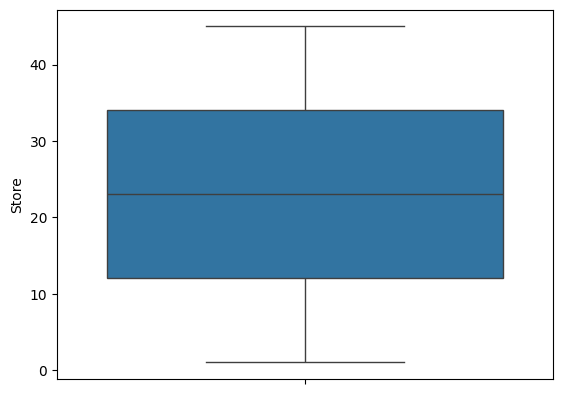

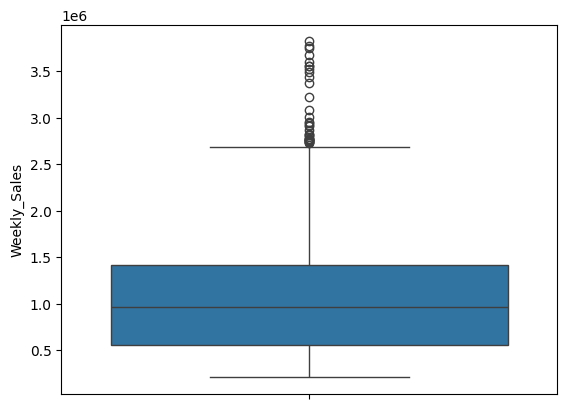

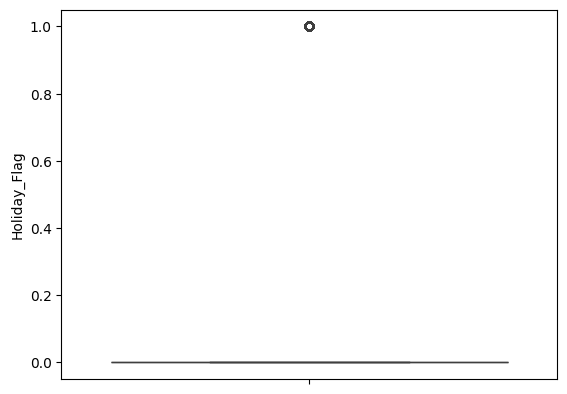

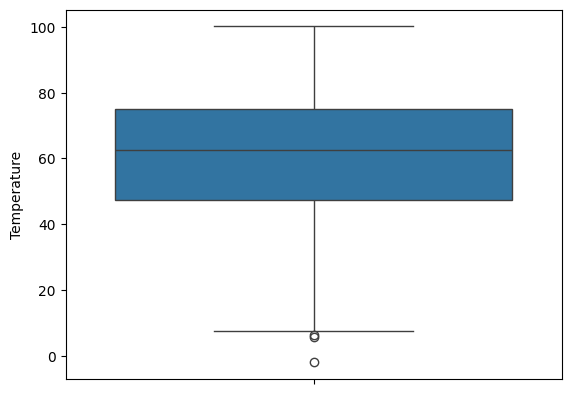

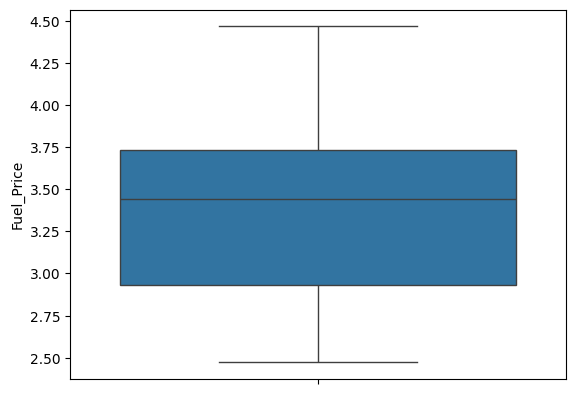

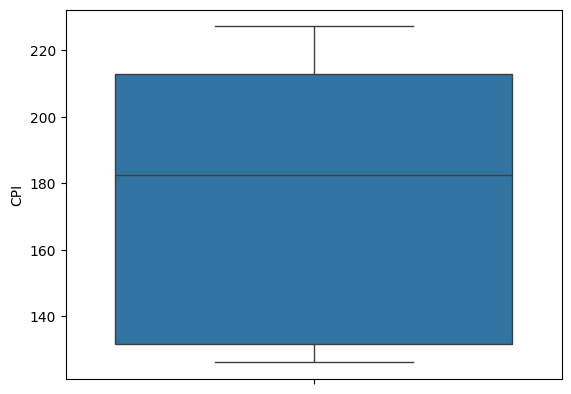

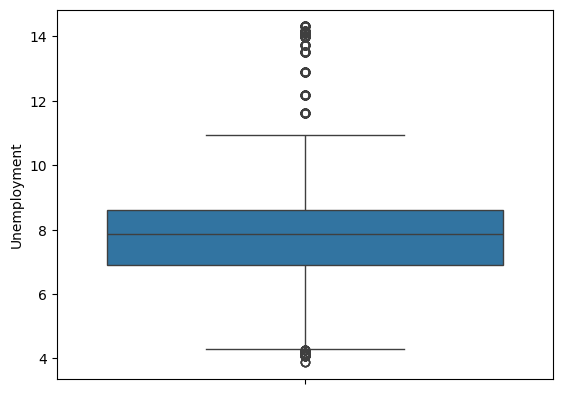

In [8]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

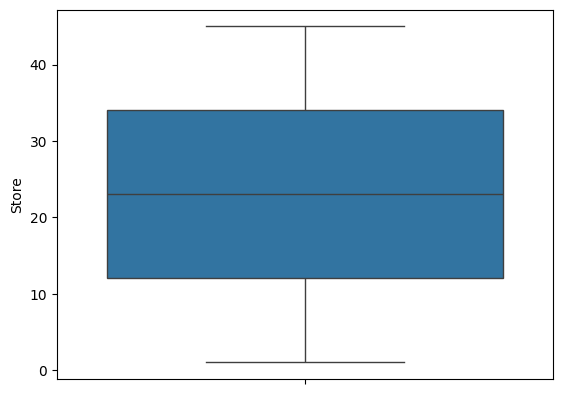

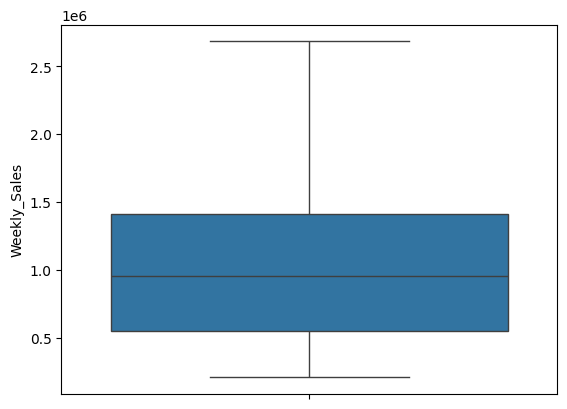

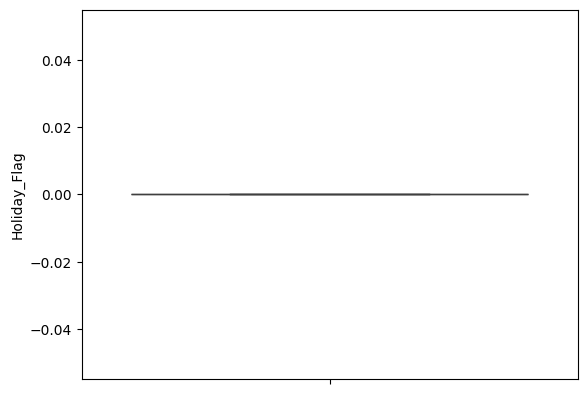

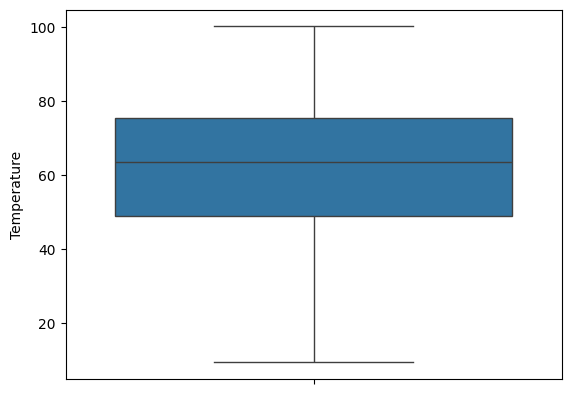

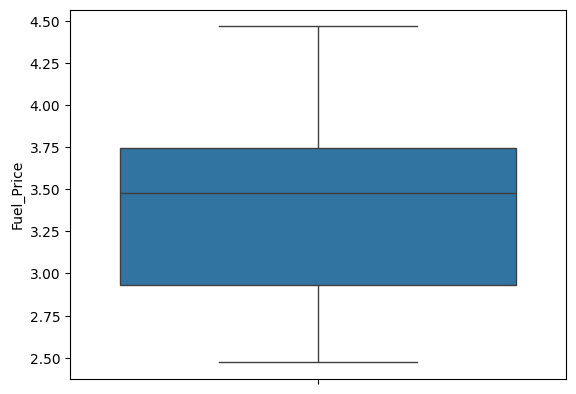

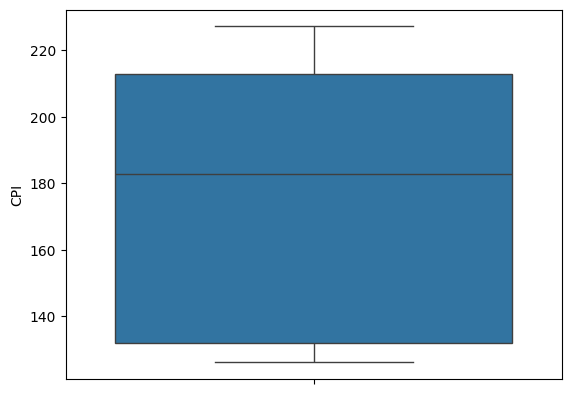

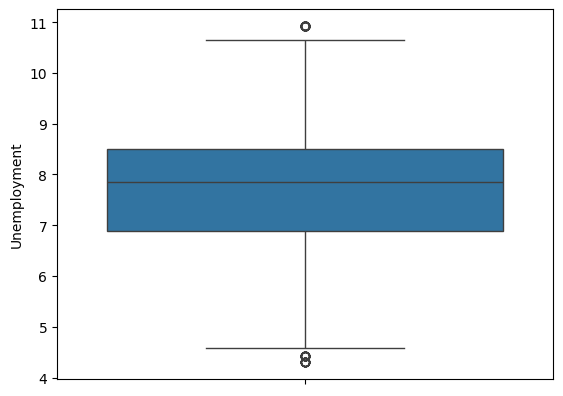

In [10]:
outliers = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']

for j in outliers:
    Q3 = df[j].quantile(0.75)
    Q1 = df[j].quantile(0.25)
    IQR = Q3 - Q1
    UB = Q3 + (1.5 * (IQR))
    LB = Q1 - (1.5 * (IQR))
    df = df[(df[j] >= LB) & (df[j] <= UB)]
    sns.boxplot(df[j])
    plt.show()

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<h4>Univariate Analysis</h4>

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,5507.0,2.278881e+01,13.092433,1.000,11.000000,22.00000,3.400000e+01,4.500000e+01
Weekly_Sales,5507.0,1.035725e+06,549293.630945,209986.250,551105.140000,943912.77000,1.422573e+06,2.678206e+06
Holiday_Flag,5507.0,0.000000e+00,0.000000,0.000,0.000000,0.00000,0.000000e+00,0.000000e+00
Temperature,5507.0,6.123082e+01,17.971288,9.510,48.455000,63.35000,7.510000e+01,1.001400e+02
Fuel_Price,5507.0,3.350147e+00,0.460119,2.472,2.895000,3.45900,3.732000e+00,4.468000e+00
CPI,5507.0,1.750240e+02,39.038267,126.064,132.761933,189.93685,2.138436e+02,2.272328e+02
Unemployment,5507.0,7.718470e+00,1.243988,4.308,6.891000,7.85200,8.494000e+00,1.092600e+01


In [13]:
df['Store'].value_counts()

Store
1     133
34    133
24    133
25    133
29    133
30    133
31    133
32    133
33    133
35    133
21    133
36    133
37    133
39    133
41    133
42    133
43    133
44    133
22    133
45    133
9     133
18    133
3     133
16    133
15    133
5     133
19    133
11    133
8     133
6     132
17    132
26    132
2     131
27    131
7     131
14    130
10    130
13    129
20    128
4     113
40     92
23     91
38     16
28     16
12     16
Name: count, dtype: int64

In [14]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [15]:
df['Holiday_Flag'].nunique()

1

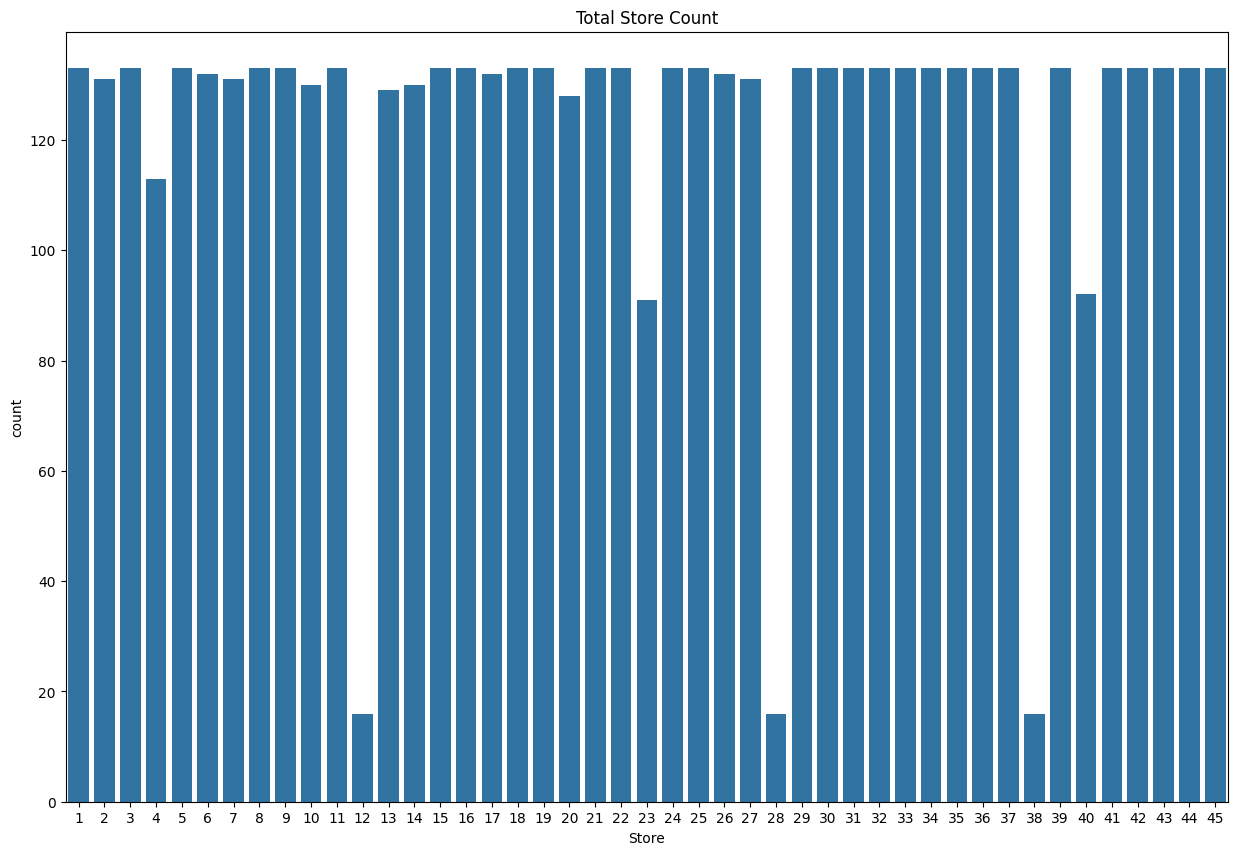

In [16]:
#Stores Count Plot
plt.figure(figsize = (15,10))
sns.countplot(x = 'Store', data = df)
plt.title("Total Store Count")
plt.show()

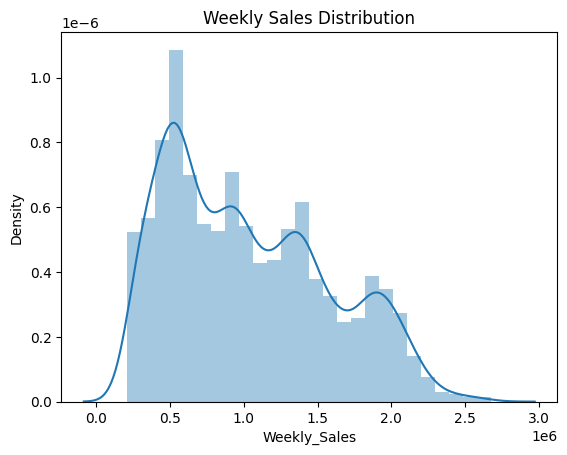

In [17]:
#Distribution plot of Weekly sales
sns.distplot(df['Weekly_Sales'])
plt.title("Weekly Sales Distribution")
plt.show()

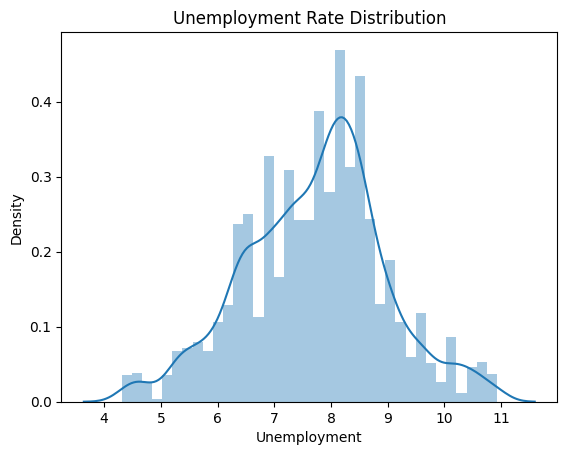

In [18]:
#Unemployment Rate Distribution
sns.distplot(df['Unemployment'])
plt.title("Unemployment Rate Distribution")
plt.show()

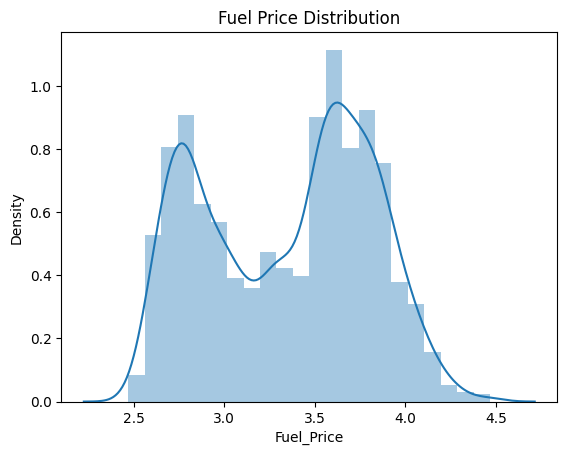

In [19]:
sns.distplot(df['Fuel_Price'])
plt.title("Fuel Price Distribution")
plt.show()

<h4>Bivariate and MultiVariate Analysis</h4>

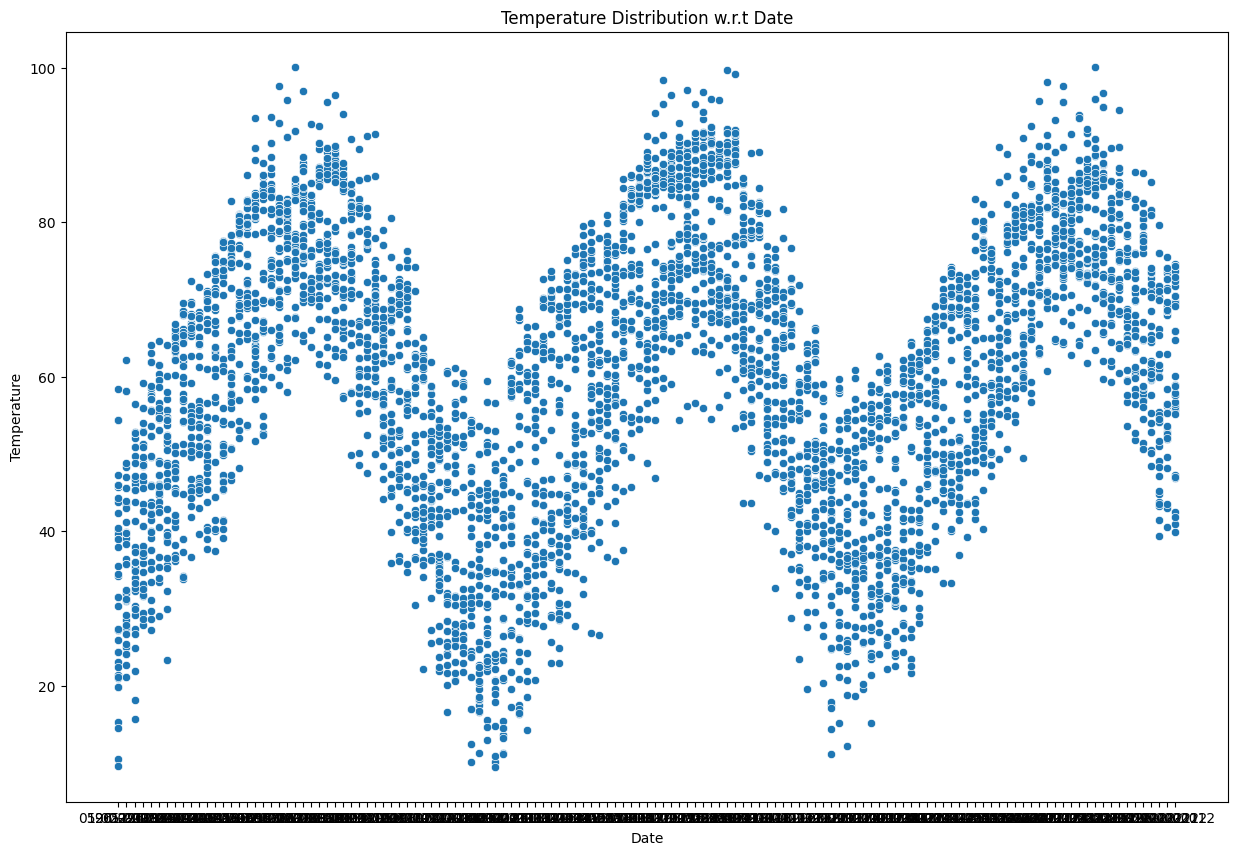

In [20]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'Date', y = 'Temperature', data = df)
plt.title("Temperature Distribution w.r.t Date")
plt.show()

In [21]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5507
Name: count, dtype: int64

<Axes: >

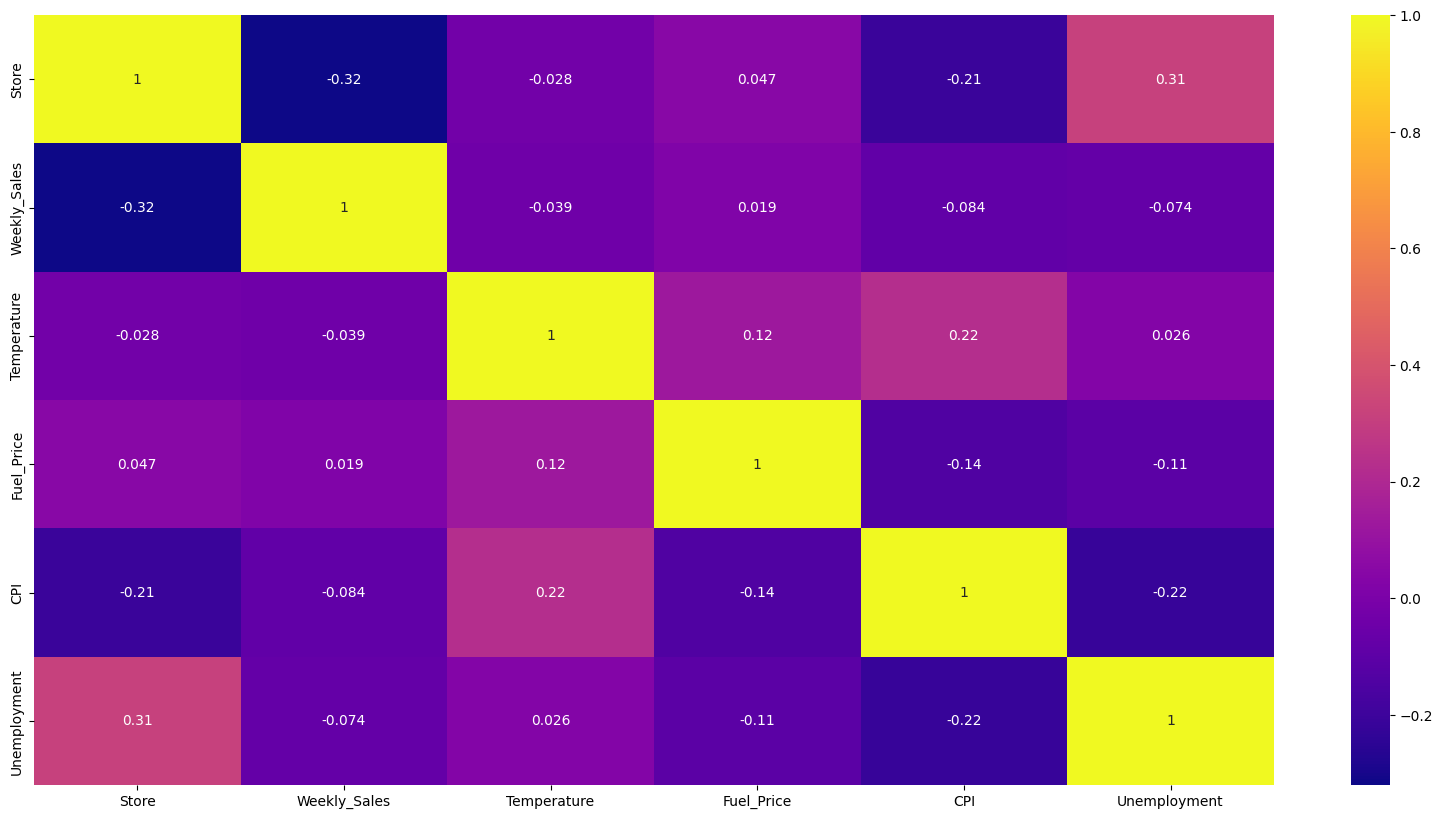

In [22]:
df1 = df.drop(['Date','Holiday_Flag'], axis = 1)
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'plasma')

In [23]:
Store_weekly_sales = df.groupby(['Store','Unemployment'])['Weekly_Sales'].mean().reset_index()
Store_weekly_sales = Store_weekly_sales.sort_values(by = ['Store','Unemployment'])
Store_weekly_sales.head(20)

,Store,Unemployment,Weekly_Sales
0,1,6.573,1.561397e+06
1,1,6.908,1.549348e+06
2,1,7.143,1.613751e+06
3,1,7.348,1.576774e+06
4,1,7.682,1.539425e+06
5,1,7.742,1.503427e+06
6,1,7.787,1.470231e+06
7,1,7.808,1.495140e+06
8,1,7.838,1.599183e+06
9,1,7.866,1.676283e+06


<h4>a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?</h4>

In [24]:
store_corr = ( df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment'])).reset_index(name = 'Sales_Unemployment_Corr'))

store_corr_sorted = store_corr.sort_values(by = 'Sales_Unemployment_Corr')

store_corr_sorted.head(10)

,Store,Sales_Unemployment_Corr
43,44,-0.801376
3,4,-0.658851
38,39,-0.427695
12,13,-0.384296
40,41,-0.382718
41,42,-0.370802
16,17,-0.300018
4,5,-0.286733
2,3,-0.275226
22,23,-0.238563


<h4>b. If the weekly sales show a seasonal trend, when and what could be the reason?</h4>

In [25]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [26]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5507 non-null   int64         
 1   Date          5507 non-null   datetime64[ns]
 2   Weekly_Sales  5507 non-null   float64       
 3   Holiday_Flag  5507 non-null   int64         
 4   Temperature   5507 non-null   float64       
 5   Fuel_Price    5507 non-null   float64       
 6   CPI           5507 non-null   float64       
 7   Unemployment  5507 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 387.2 KB


In [28]:
Seasonal_sales_trend = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

Seasonal_sales_trend.set_index('Date', inplace = True)

Seasonal_sales_trend = Seasonal_sales_trend.groupby(pd.Grouper(freq = 'M')).sum()

Seasonal_sales_trend

,Weekly_Sales
Date,
2010-01-31,3.982560e+07
2010-02-28,1.802125e+08
2010-03-31,1.752329e+08
2010-04-30,1.732263e+08
2010-05-31,2.640776e+08
2010-06-30,1.344962e+08
2010-07-31,1.739798e+08
2010-08-31,1.744531e+08
2010-09-30,1.696679e+08


<Figure size 1500x1000 with 0 Axes>

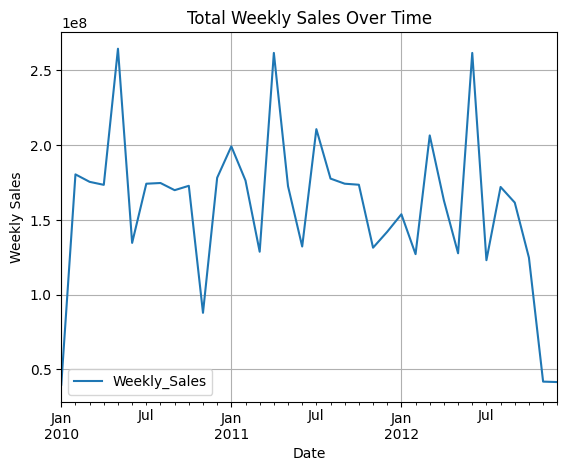

In [29]:
plt.figure(figsize = (15, 10))
Seasonal_sales_trend.plot(title="Total Weekly Sales Over Time", xlabel="Date", ylabel="Weekly Sales", grid=True)
plt.show()

There indeed exists a seasonal trend in the weekly sales due to seasonal change, temperature, and holidays

<h4>C. Does temperature affect the weekly sales in any manner?</h4>

In [30]:
Temp_weekly_Sales = df.groupby('Temperature')['Weekly_Sales'].mean().reset_index()
Temp_weekly_Sales = Temp_weekly_Sales.sort_values(by = 'Temperature')
Temp_weekly_Sales

,Temperature,Weekly_Sales
0,9.51,775910.43
1,9.55,1034119.21
2,10.09,661163.94
3,10.11,513372.17
4,10.53,496725.44
...,...,...
3205,98.43,226702.36
3206,99.20,239198.36
3207,99.66,237095.82
3208,100.07,297753.49


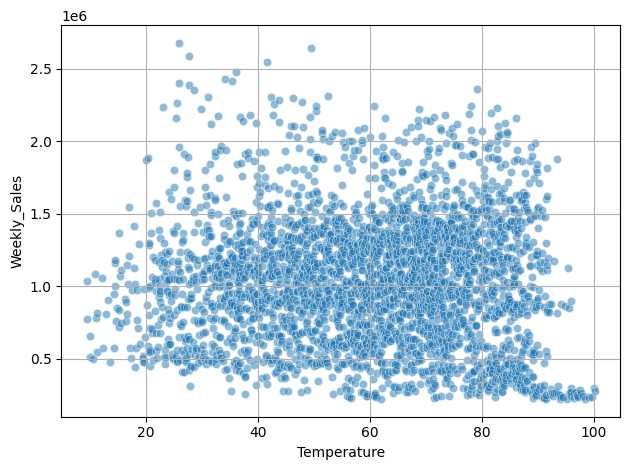

In [31]:
sns.scatterplot(x = 'Temperature', y = 'Weekly_Sales', data = Temp_weekly_Sales, alpha = 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
temp_corr = ( df.groupby('Temperature').apply(lambda x: x['Temperature'].corr(x['Weekly_Sales'])).reset_index(name = 'Temp_weekly_sales'))
temp_corr_sorted = temp_corr.sort_values(by = 'Temp_weekly_sales')
temp_corr_sorted

,Temperature,Temp_weekly_sales
1580,61.05,-3.210358e-16
3184,94.22,-2.819173e-16
2956,85.53,-2.612974e-16
726,43.64,-2.569380e-16
3178,93.47,-2.544644e-16
...,...,...
3205,98.43,NaN
3206,99.20,NaN
3207,99.66,NaN
3208,100.07,NaN


There exists a weak correlation between temperature and weekly sales.
Temperature does not appear to significantly affect weekly sales on its own, at least not in a straightforward linear way.

<h4>d. How is the Consumer Price index affecting the weekly sales of various stores?</h4>

In [33]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [34]:
Store_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
Store_weekly_sales

,Store,Weekly_Sales
0,1,1.546957e+06
1,2,1.892591e+06
2,3,4.000648e+05
3,4,2.036610e+06
4,5,3.148923e+05
5,6,1.547117e+06
6,7,5.627662e+05
7,8,9.037434e+05
8,9,5.405993e+05
9,10,1.849473e+06


In [35]:
store_cpi = df.groupby('Store')['CPI'].mean().reset_index()
store_cpi

,Store,CPI
0,1,216.031272
1,2,215.690521
2,3,219.426602
3,4,128.391474
4,5,216.600078
5,6,217.623283
6,7,193.662011
7,8,219.474107
8,9,219.661808
9,10,128.711729


In [36]:
weekly_sales_cpi = pd.merge(Store_weekly_sales, store_cpi, on = 'Store')
weekly_sales_cpi

,Store,Weekly_Sales,CPI
0,1,1.546957e+06,216.031272
1,2,1.892591e+06,215.690521
2,3,4.000648e+05,219.426602
3,4,2.036610e+06,128.391474
4,5,3.148923e+05,216.600078
5,6,1.547117e+06,217.623283
6,7,5.627662e+05,193.662011
7,8,9.037434e+05,219.474107
8,9,5.405993e+05,219.661808
9,10,1.849473e+06,128.711729


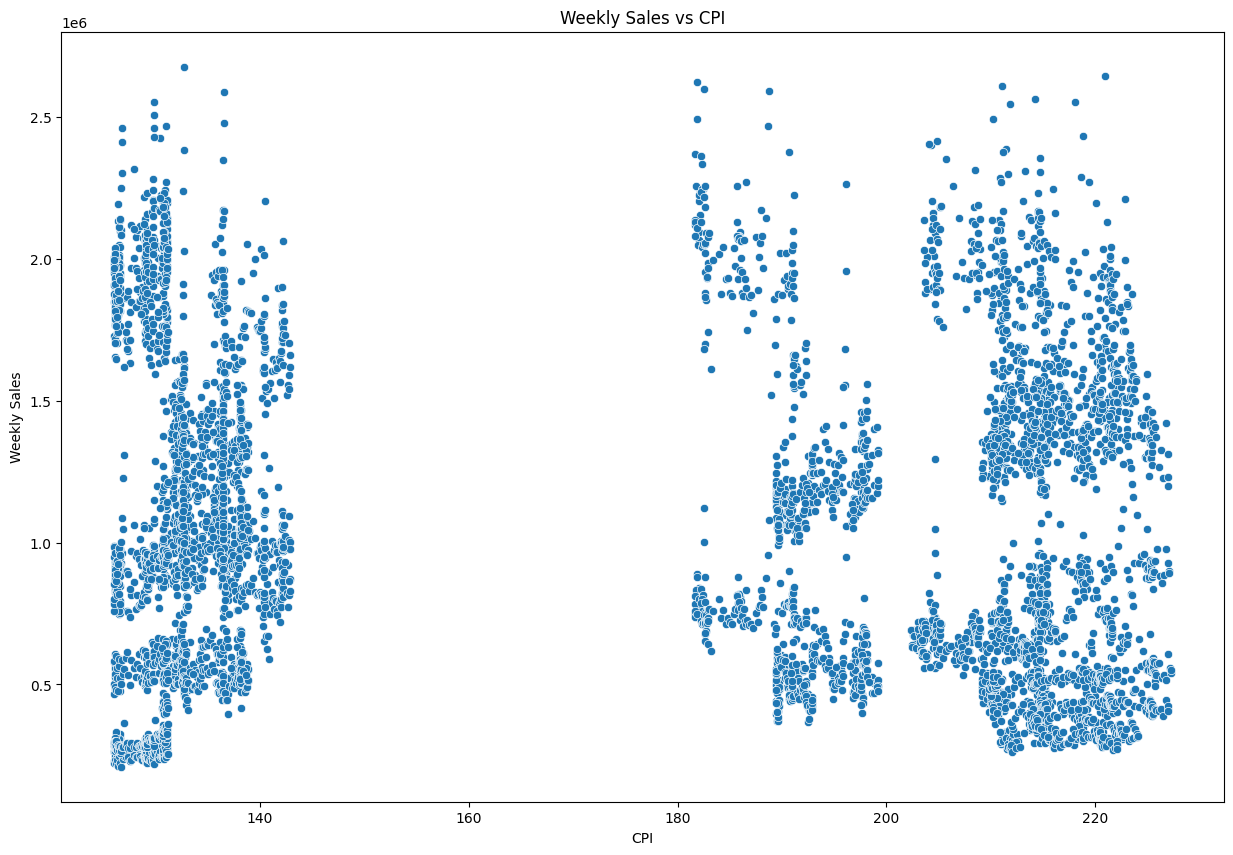

In [37]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()



The scatter plot shows a weak negative correlation between the Consumer Price Index (CPI) and Weekly Sales across all stores.
This suggests that CPI has a minimal inverse impact on weekly sales — higher CPI might slightly reduce sales, but the effect is not practically strong.

<h4>e. Top performing stores according to the historical data.</h4>

In [38]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [39]:
top_performing_stores = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_performing_stores = top_performing_stores.sort_values(by = 'Weekly_Sales', ascending = False)
top_performing_stores.head()

,Store,Weekly_Sales
19,20,2.632513e+08
13,14,2.578435e+08
12,13,2.527026e+08
1,2,2.479294e+08
9,10,2.404315e+08


The top performing stores according to historical data are stores 20, 14, 13, 2, 10.

<h4>f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.</h4>

In [40]:
Worst_performing_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
Worst_performing_store = top_performing_stores.sort_values(by = 'Weekly_Sales', ascending = True)
Worst_performing_store.head(1)

,Store,Weekly_Sales
37,38,6857104.07


The worst performing store is store no. 38

In [41]:
best_store = top_performing_stores.idxmax()
best_sales = top_performing_stores.max()

In [42]:
worst_store = Worst_performing_store.idxmin()
worst_sales = Worst_performing_store.min()

In [43]:
absolute_difference = best_sales - worst_sales
percentage_difference = (absolute_difference / worst_sales) * 100

In [44]:
print(absolute_difference)
print(percentage_difference)

Store           4.400000e+01
Weekly_Sales    2.563941e+08
dtype: float64
Store           4400.000000
Weekly_Sales    3739.102464
dtype: float64


There exists a significant difference between the highest and lowest performing stores.

<h2>Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.</h2>

In [45]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [46]:
df['Date'] = df['Date'].astype('object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5507 non-null   int64  
 1   Date          5507 non-null   object 
 2   Weekly_Sales  5507 non-null   float64
 3   Holiday_Flag  5507 non-null   int64  
 4   Temperature   5507 non-null   float64
 5   Fuel_Price    5507 non-null   float64
 6   CPI           5507 non-null   float64
 7   Unemployment  5507 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 387.2+ KB


In [48]:
sales_sum = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
first_date = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [49]:
df1

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,42.31,2.572,211.096358,8.106
2,1,1611968.17,39.93,2.514,211.289143,8.106
3,1,1409727.59,46.63,2.561,211.319643,8.106
4,1,1554806.68,46.50,2.625,211.350143,8.106
5,1,1439541.59,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...
6430,45,713173.95,64.88,3.997,192.013558,8.684
6431,45,733455.07,64.89,3.985,192.170412,8.667
6432,45,734464.36,54.47,4.000,192.327265,8.667
6433,45,718125.53,56.47,3.969,192.330854,8.667


In [50]:
df1 = df[['Date','Store','Weekly_Sales']]
df1

,Date,Store,Weekly_Sales
0,2010-05-02 00:00:00,1,1643690.90
2,2010-02-19 00:00:00,1,1611968.17
3,2010-02-26 00:00:00,1,1409727.59
4,2010-05-03 00:00:00,1,1554806.68
5,2010-12-03 00:00:00,1,1439541.59
...,...,...,...
6430,2012-09-28 00:00:00,45,713173.95
6431,2012-05-10 00:00:00,45,733455.07
6432,2012-12-10 00:00:00,45,734464.36
6433,2012-10-19 00:00:00,45,718125.53


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5507 non-null   object 
 1   Store         5507 non-null   int64  
 2   Weekly_Sales  5507 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 172.1+ KB


In [52]:
df1['Date'] = pd.to_datetime(df1['Date'], format = 'mixed')

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5507 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5507 non-null   datetime64[ns]
 1   Store         5507 non-null   int64         
 2   Weekly_Sales  5507 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 172.1 KB


In [54]:
df1.sort_values(by = 'Date', inplace = True)

In [55]:
df1.set_index('Date', inplace = True)

In [56]:
df1 = df1.sort_values(['Store', 'Date'])

In [57]:
df1

,Store,Weekly_Sales
Date,,
2010-01-10,1,1453329.50
2010-02-04,1,1594968.28
2010-02-07,1,1492418.14
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
...,...,...
2012-10-08,45,733037.32
2012-10-19,45,718125.53
2012-10-26,45,760281.43


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2010-01-10 to 2012-12-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5507 non-null   int64  
 1   Weekly_Sales  5507 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 129.1 KB


In [59]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1["Weekly_Sales"])

print(result[1]) #p-Value to determine whether the time series data is stationary or not

2.346301126524917e-05


Since p-value < 005 hence data is stationary

<h4>Autocorrelation Plots</h4>

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

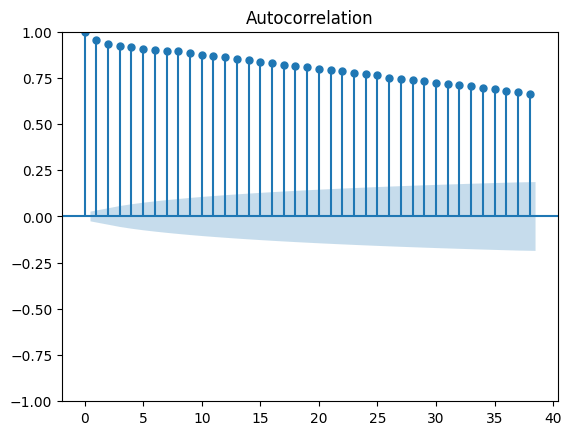

In [61]:
plt.figure(figsize = (12, 6))

plot_acf(df1["Weekly_Sales"]);

<Figure size 1200x600 with 0 Axes>

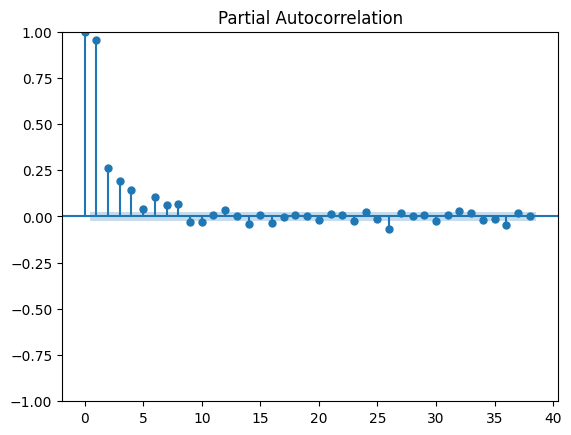

In [62]:
plt.figure(figsize = (12, 6))

plot_pacf(df1['Weekly_Sales']);

From the autocorrelation plots q = 2, p = 2

<h3>Autoregressive Models</h3>

1.) Autoregressive integrated with Moving Average (ARIMA)

2.) Seasonal Autoregressive integrated with Moving Average (SARIMA)

In [63]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
# 1. Loop over all stores and forecast
all_forecasts = []

for store_id in sorted(df1["Store"].unique()):
    # Filter data for this store
    store_data = df1[df1["Store"] == store_id]
    
    # Ensure weekly frequency
    store_data = store_data.asfreq("W")["Weekly_Sales"]
    
    # ARIMA Model
    arima_model = ARIMA(store_data, order=(2, 2, 2))
    arima_fit = arima_model.fit(method_kwargs={'maxiter':300})
    arima_forecast = arima_fit.forecast(steps=12)
    
    # SARIMA Model (yearly seasonality for weekly data → 52 weeks)
    sarima_model = SARIMAX(store_data, order=(2, 2, 2), seasonal_order=(2, 2, 2, 52))
    sarima_fit = sarima_model.fit(method_kwargs={'maxiter':300}, disp=False)
    sarima_forecast = sarima_fit.forecast(steps=12)
    
    # Combine forecasts into DataFrame
    store_forecasts = pd.DataFrame({
        "Store": store_id,
        "Date": arima_forecast.index,
        "ARIMA_Forecast": arima_forecast.values,
        "SARIMA_Forecast": sarima_forecast.values
    })
    
    all_forecasts.append(store_forecasts)

In [67]:
final_forecasts = pd.concat(all_forecasts, ignore_index=True)

In [68]:
print(final_forecasts)

     Store       Date  ARIMA_Forecast  SARIMA_Forecast
0        1 2012-12-16   -1.642738e+07     4.214376e+06
1        1 2012-12-23   -1.709504e+07     4.612685e+06
2        1 2012-12-30   -1.697476e+07     5.071433e+06
3        1 2013-01-06   -1.650961e+07     7.091557e+06
4        1 2013-01-13   -1.656523e+07     7.906075e+06
..     ...        ...             ...              ...
535     45 2013-02-03    3.084877e+06     3.009866e+06
536     45 2013-02-10    3.110750e+06     2.758450e+06
537     45 2013-02-17    3.127308e+06     2.573668e+06
538     45 2013-02-24    3.146030e+06     2.457975e+06
539     45 2013-03-03    3.176064e+06     2.413828e+06

[540 rows x 4 columns]


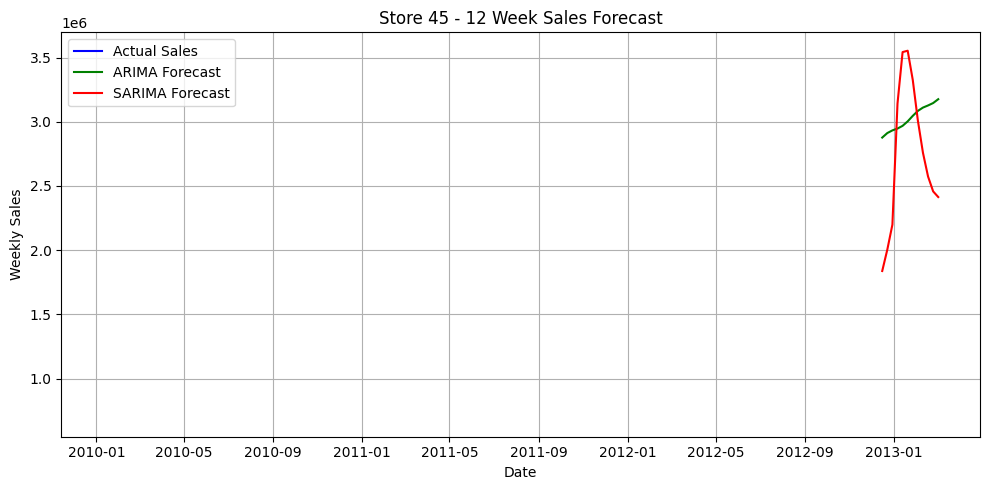

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(store_data.index, store_data, label="Actual Sales", color="blue")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast", color="green")
plt.plot(sarima_forecast.index, sarima_forecast, label="SARIMA Forecast", color="red")
plt.title(f"Store {store_id} - 12 Week Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()